# EUGuessr

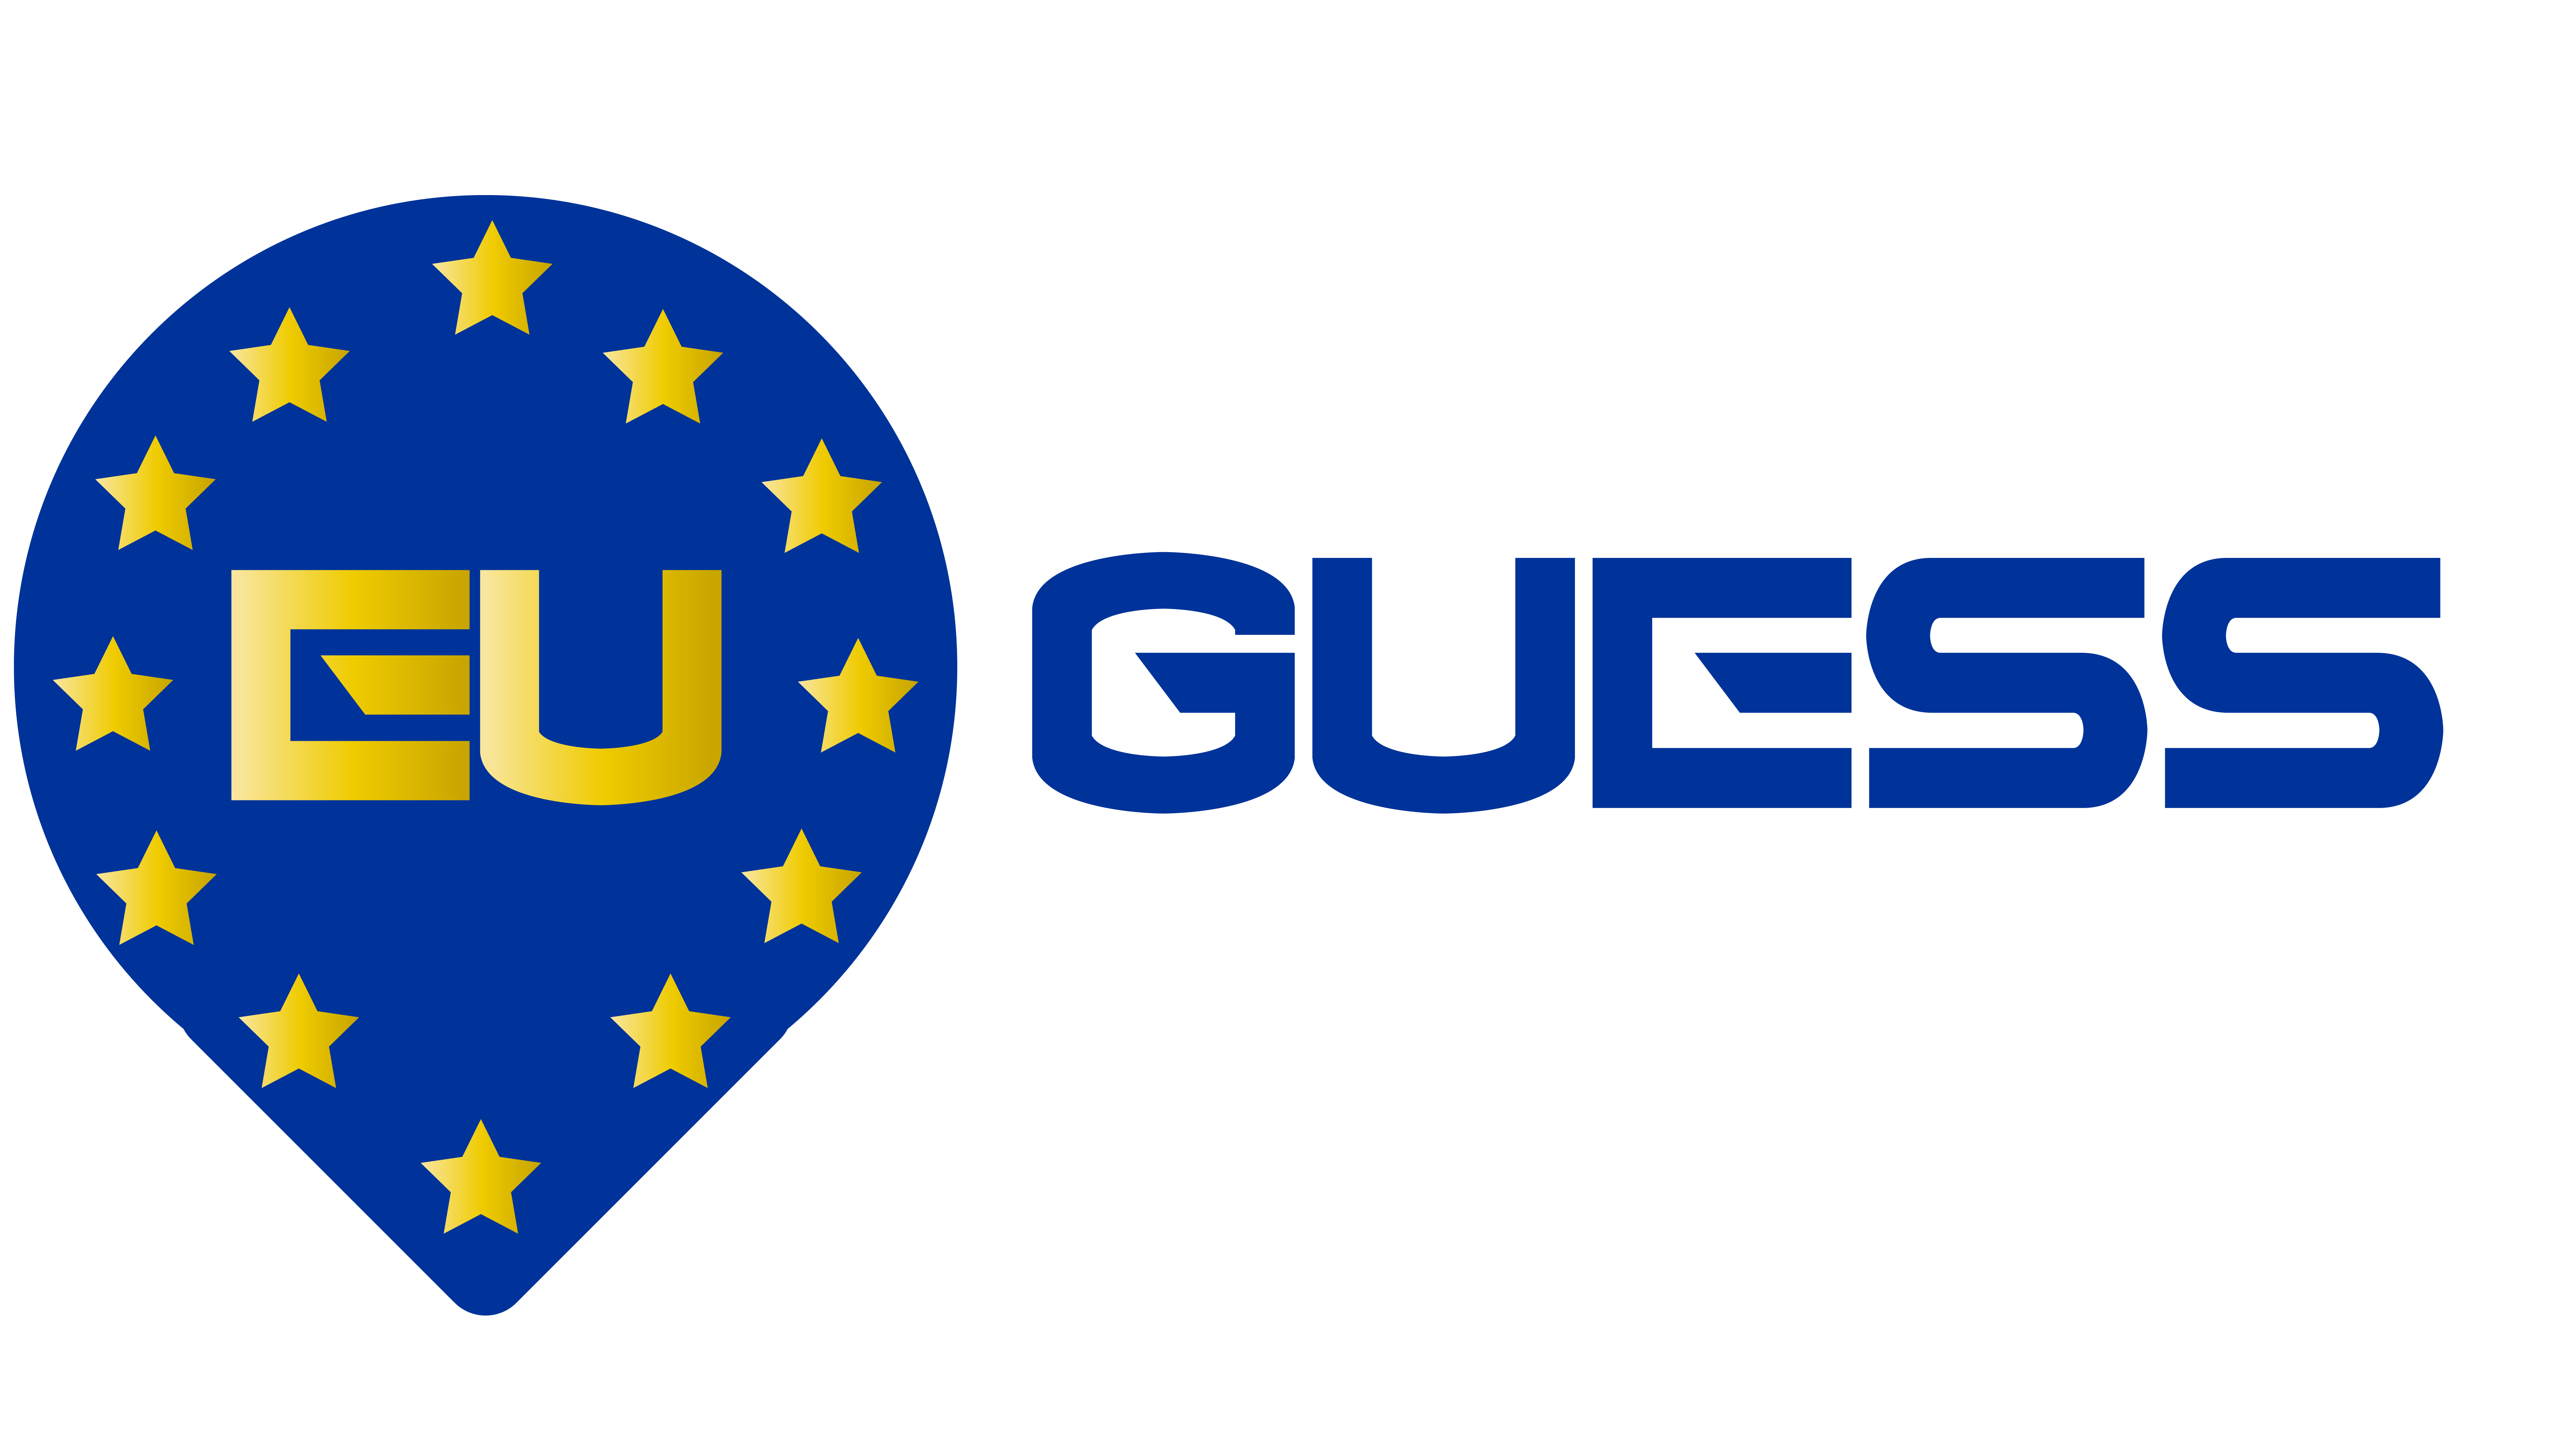

# Initialization:

Connect your Google Drive with Colab in order to set up the environment. Run the following cells and make sure the path is correct:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/EUGUESS

# Game

You are going to play 10 rounds against EUGuess. Please execute one by one all cells below and make your guess. (You may need yo check the directories in order to run the cells).

In [ ]:
from utils import image_to_tensor_resize
import glob
import os
import random
import pandas as pd
from ipywidgets import widgets
from IPython.display import display
from IPython.display import clear_output
from IPython.utils import capture
from IPython.display import Image 
import torch
import numpy as np
import torchvision.models as models


#@markdown 
scoreboard = {}

In [ ]:
#@markdown ---
#@markdown # EUGuess Game:
#@markdown ---

correct_model, correct_player = 0, 0

name = input("Enter your name: ")

scoreboard[name] = 0

Enter your name: Eva2


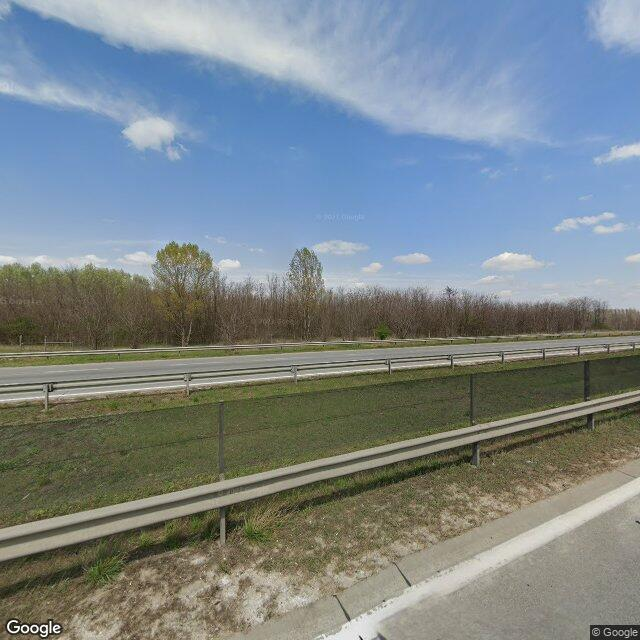

In [ ]:

#@markdown ## Round 1:
#@markdown ---

files = sorted(glob.glob(f"/content/drive/MyDrive/EUGuess/GAME/*jpg"))

idx = random.randint(0, len(files)-1)


mapping = {"Albania": 0, "Austria": 1, "Belgium": 2, "Bosnia Herzegovina": 3, "Bulgaria": 4, "Croatia": 5, "Czech Republic": 6, "Denmark": 7, "Estonia": 8, "Finland": 9, "France": 10, "North Macedonia": 11, "Germany": 12, "Great Britain": 13, "Greece": 14, "Hungary": 15, "Italy": 16, "Latvia": 17, "Lithuania": 18, "Luxembourg": 19, "Montenegro": 20, "Netherlands": 21,  "Poland": 22, "Portugal": 23, "Romania": 24, "Serbia": 25, "Slovakia": 26, "Slovenia": 27, "Spain": 28, "Sweden": 29, "Switzerland": 30, "Turkey": 31} 
counter = {"Albania": 0, "Austria": 0, "Belgium": 0, "Bosnia Herzegovina": 0, "Bulgaria": 0, "Croatia": 0, "Czech Republic": 0, "Denmark": 0, "Estonia": 0, "Finland": 0, "France": 0, "North Macedonia": 0, "Germany": 0, "Great Britain": 0, "Greece": 0, "Hungary": 0, "Italy": 0, "Latvia": 0, "Lithuania": 0, "Luxembourg": 0, "Montenegro": 0, "Netherlands": 0,  "Poland": 0, "Portugal": 0, "Romania": 0, "Serbia": 0, "Slovakia": 0, "Slovenia": 0, "Spain": 0, "Sweden": 0, "Switzerland": 0, "Turkey": 0} 

img = os.path.split(files[idx])[1]

tensor = image_to_tensor_resize(img, 64)
country = img.split("_")[0]

data_country = tensor
labels_country = mapping[country]
tup = (tensor, mapping[country])
join_data_country = tup
labels_country = torch.tensor(labels_country)
data_country = np.array(data_country)

pil_img = Image(filename=files[idx])
display(pil_img)

In [ ]:
################################################################################
# Markdown Format:                                                             #
################################################################################

#@markdown ---

mapping = {"Albania": 0, "Austria": 1, "Belgium": 2, "Bosnia Herzegovina": 3, "Bulgaria": 4, "Croatia": 5, "Czech Republic": 6, "Denmark": 7, "Estonia": 8, "Finland": 9, "France": 10, "North Macedonia": 11, "Germany": 12, "Great Britain": 13, "Greece": 14, "Hungary": 15, "Italy": 16, "Latvia": 17, "Lithuania": 18, "Luxembourg": 19, "Montenegro": 20, "Netherlands": 21,  "Poland": 22, "Portugal": 23, "Romania": 24, "Serbia": 25, "Slovakia": 26, "Slovenia": 27, "Spain": 28, "Sweden": 29, "Switzerland": 30, "Turkey": 31} 



def googlenet_model():

    model = models.googlenet(pretrained=True, progress=True)

    model.eval()
    return model


net = googlenet_model()

model_save_name = 'googlenet_25acc.pt'
path = F"/content/drive/MyDrive/EUGUESS/MODELS/{model_save_name}" 
net.load_state_dict(torch.load(path), strict=False)


inputs = torch.tensor(data_country).unsqueeze(0)

output = net(inputs)

prediction = torch.max(output, dim=-1)

player_guess = "Romania" #@param ["", "Albania", "Austria", "Belgium", "Bosnia Herzegovina", "Bulgaria", "Croatia", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "North Macedonia", "Germany", "Great Britain", "Greece", "Hungary", "Italy", "Latvia", "Lithuania", "Luxembourg", "Montenegro", "Netherlands",  "Poland", "Portugal", "Romania", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey"]

pred_model = [k for k, v in mapping.items() if v == prediction[1]]



print("\n")
print("Predictions:")

real = [k for k, v in mapping.items() if v == labels_country]
print("Real: {}".format(real[0]))


print("EUGuess: {}".format(pred_model[0]))


print("Player: {}".format(player_guess))


#@markdown ---

if player_guess == real[0]:
  correct_player += 1

if pred_model[0] == real[0]:
  correct_model += 1



Predictions:
Real: Hungary
EUGuess: Great Britain
Player: Romania


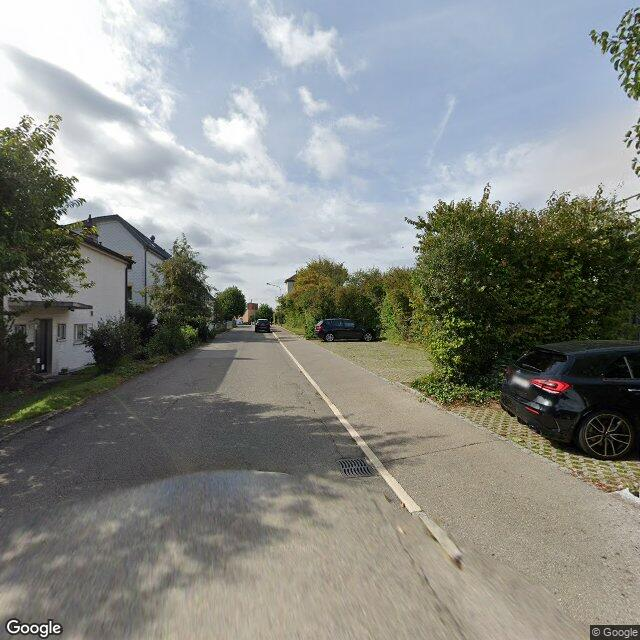

In [ ]:

#@markdown ## Round 2:
#@markdown ---

files = sorted(glob.glob(f"/content/drive/MyDrive/EUGuess/GAME/*jpg"))

idx = random.randint(0, len(files)-1)


mapping = {"Albania": 0, "Austria": 1, "Belgium": 2, "Bosnia Herzegovina": 3, "Bulgaria": 4, "Croatia": 5, "Czech Republic": 6, "Denmark": 7, "Estonia": 8, "Finland": 9, "France": 10, "North Macedonia": 11, "Germany": 12, "Great Britain": 13, "Greece": 14, "Hungary": 15, "Italy": 16, "Latvia": 17, "Lithuania": 18, "Luxembourg": 19, "Montenegro": 20, "Netherlands": 21,  "Poland": 22, "Portugal": 23, "Romania": 24, "Serbia": 25, "Slovakia": 26, "Slovenia": 27, "Spain": 28, "Sweden": 29, "Switzerland": 30, "Turkey": 31} 
counter = {"Albania": 0, "Austria": 0, "Belgium": 0, "Bosnia Herzegovina": 0, "Bulgaria": 0, "Croatia": 0, "Czech Republic": 0, "Denmark": 0, "Estonia": 0, "Finland": 0, "France": 0, "North Macedonia": 0, "Germany": 0, "Great Britain": 0, "Greece": 0, "Hungary": 0, "Italy": 0, "Latvia": 0, "Lithuania": 0, "Luxembourg": 0, "Montenegro": 0, "Netherlands": 0,  "Poland": 0, "Portugal": 0, "Romania": 0, "Serbia": 0, "Slovakia": 0, "Slovenia": 0, "Spain": 0, "Sweden": 0, "Switzerland": 0, "Turkey": 0} 

img = os.path.split(files[idx])[1]

tensor = image_to_tensor_resize(img, 64)
country = img.split("_")[0]

data_country = tensor
labels_country = mapping[country]
tup = (tensor, mapping[country])
join_data_country = tup
labels_country = torch.tensor(labels_country)
data_country = np.array(data_country)

pil_img = Image(filename=files[idx])
display(pil_img)

In [ ]:
################################################################################
# Markdown Format:                                                             #
################################################################################

#@markdown ---

mapping = {"Albania": 0, "Austria": 1, "Belgium": 2, "Bosnia Herzegovina": 3, "Bulgaria": 4, "Croatia": 5, "Czech Republic": 6, "Denmark": 7, "Estonia": 8, "Finland": 9, "France": 10, "North Macedonia": 11, "Germany": 12, "Great Britain": 13, "Greece": 14, "Hungary": 15, "Italy": 16, "Latvia": 17, "Lithuania": 18, "Luxembourg": 19, "Montenegro": 20, "Netherlands": 21,  "Poland": 22, "Portugal": 23, "Romania": 24, "Serbia": 25, "Slovakia": 26, "Slovenia": 27, "Spain": 28, "Sweden": 29, "Switzerland": 30, "Turkey": 31} 



def googlenet_model():

    model = models.googlenet(pretrained=True, progress=True)

    model.eval()
    return model


net = googlenet_model()

model_save_name = 'googlenet_25acc.pt'
path = F"/content/drive/MyDrive/EUGUESS/MODELS/{model_save_name}" 
net.load_state_dict(torch.load(path), strict=False)


inputs = torch.tensor(data_country).unsqueeze(0)

output = net(inputs)

prediction = torch.max(output, dim=-1)

player_guess = "Romania" #@param ["", "Albania", "Austria", "Belgium", "Bosnia Herzegovina", "Bulgaria", "Croatia", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "North Macedonia", "Germany", "Great Britain", "Greece", "Hungary", "Italy", "Latvia", "Lithuania", "Luxembourg", "Montenegro", "Netherlands",  "Poland", "Portugal", "Romania", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey"]

pred_model = [k for k, v in mapping.items() if v == prediction[1]]



print("\n")
print("Predictions:")

real = [k for k, v in mapping.items() if v == labels_country]
print("Real: {}".format(real[0]))


print("EUGuess: {}".format(pred_model[0]))


print("Player: {}".format(player_guess))


#@markdown ---

if player_guess == real[0]:
  correct_player += 1

if pred_model[0] == real[0]:
  correct_model += 1



Predictions:
Real: Switzerland
EUGuess: Poland
Player: Hungary


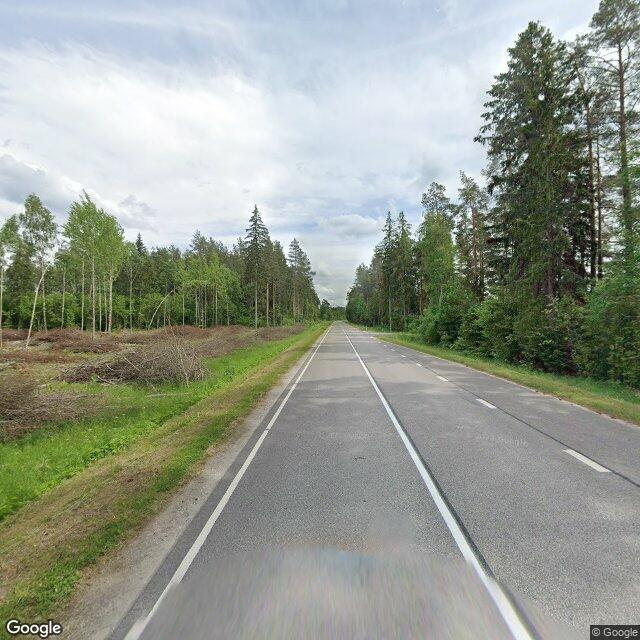

In [ ]:

#@markdown ## Round 3:
#@markdown ---

files = sorted(glob.glob(f"/content/drive/MyDrive/EUGuess/GAME/*jpg"))

idx = random.randint(0, len(files)-1)


mapping = {"Albania": 0, "Austria": 1, "Belgium": 2, "Bosnia Herzegovina": 3, "Bulgaria": 4, "Croatia": 5, "Czech Republic": 6, "Denmark": 7, "Estonia": 8, "Finland": 9, "France": 10, "North Macedonia": 11, "Germany": 12, "Great Britain": 13, "Greece": 14, "Hungary": 15, "Italy": 16, "Latvia": 17, "Lithuania": 18, "Luxembourg": 19, "Montenegro": 20, "Netherlands": 21,  "Poland": 22, "Portugal": 23, "Romania": 24, "Serbia": 25, "Slovakia": 26, "Slovenia": 27, "Spain": 28, "Sweden": 29, "Switzerland": 30, "Turkey": 31} 
counter = {"Albania": 0, "Austria": 0, "Belgium": 0, "Bosnia Herzegovina": 0, "Bulgaria": 0, "Croatia": 0, "Czech Republic": 0, "Denmark": 0, "Estonia": 0, "Finland": 0, "France": 0, "North Macedonia": 0, "Germany": 0, "Great Britain": 0, "Greece": 0, "Hungary": 0, "Italy": 0, "Latvia": 0, "Lithuania": 0, "Luxembourg": 0, "Montenegro": 0, "Netherlands": 0,  "Poland": 0, "Portugal": 0, "Romania": 0, "Serbia": 0, "Slovakia": 0, "Slovenia": 0, "Spain": 0, "Sweden": 0, "Switzerland": 0, "Turkey": 0} 

img = os.path.split(files[idx])[1]

tensor = image_to_tensor_resize(img, 64)
country = img.split("_")[0]

data_country = tensor
labels_country = mapping[country]
tup = (tensor, mapping[country])
join_data_country = tup
labels_country = torch.tensor(labels_country)
data_country = np.array(data_country)

pil_img = Image(filename=files[idx])
display(pil_img)

In [ ]:
################################################################################
# Markdown Format:                                                             #
################################################################################

#@markdown ---

mapping = {"Albania": 0, "Austria": 1, "Belgium": 2, "Bosnia Herzegovina": 3, "Bulgaria": 4, "Croatia": 5, "Czech Republic": 6, "Denmark": 7, "Estonia": 8, "Finland": 9, "France": 10, "North Macedonia": 11, "Germany": 12, "Great Britain": 13, "Greece": 14, "Hungary": 15, "Italy": 16, "Latvia": 17, "Lithuania": 18, "Luxembourg": 19, "Montenegro": 20, "Netherlands": 21,  "Poland": 22, "Portugal": 23, "Romania": 24, "Serbia": 25, "Slovakia": 26, "Slovenia": 27, "Spain": 28, "Sweden": 29, "Switzerland": 30, "Turkey": 31} 



def googlenet_model():

    model = models.googlenet(pretrained=True, progress=True)

    model.eval()
    return model


net = googlenet_model()

model_save_name = 'googlenet_25acc.pt'
path = F"/content/drive/MyDrive/EUGUESS/MODELS/{model_save_name}" 
net.load_state_dict(torch.load(path), strict=False)


inputs = torch.tensor(data_country).unsqueeze(0)

output = net(inputs)

prediction = torch.max(output, dim=-1)

player_guess = "Romania" #@param ["", "Albania", "Austria", "Belgium", "Bosnia Herzegovina", "Bulgaria", "Croatia", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "North Macedonia", "Germany", "Great Britain", "Greece", "Hungary", "Italy", "Latvia", "Lithuania", "Luxembourg", "Montenegro", "Netherlands",  "Poland", "Portugal", "Romania", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey"]

pred_model = [k for k, v in mapping.items() if v == prediction[1]]



print("\n")
print("Predictions:")

real = [k for k, v in mapping.items() if v == labels_country]
print("Real: {}".format(real[0]))


print("EUGuess: {}".format(pred_model[0]))


print("Player: {}".format(player_guess))


#@markdown ---

if player_guess == real[0]:
  correct_player += 1

if pred_model[0] == real[0]:
  correct_model += 1



Predictions:
Real: Estonia
EUGuess: Poland
Player: Latvia


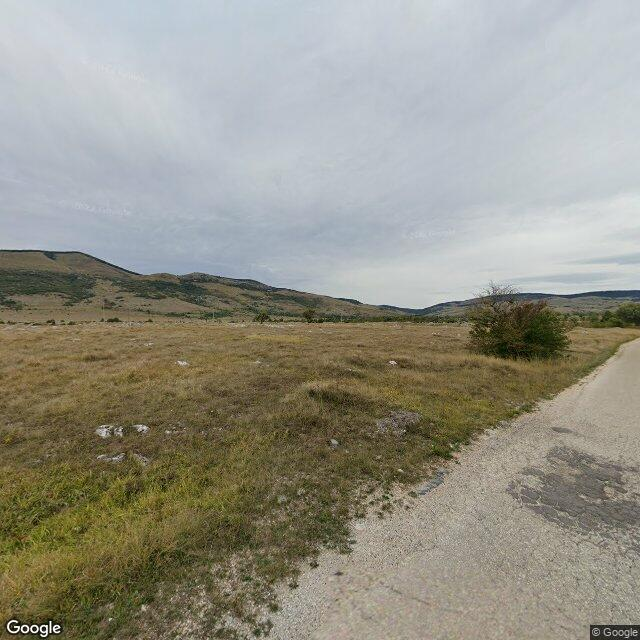

In [ ]:

#@markdown ## Round 4:
#@markdown ---

files = sorted(glob.glob(f"/content/drive/MyDrive/EUGuess/GAME/*jpg"))

idx = random.randint(0, len(files)-1)


mapping = {"Albania": 0, "Austria": 1, "Belgium": 2, "Bosnia Herzegovina": 3, "Bulgaria": 4, "Croatia": 5, "Czech Republic": 6, "Denmark": 7, "Estonia": 8, "Finland": 9, "France": 10, "North Macedonia": 11, "Germany": 12, "Great Britain": 13, "Greece": 14, "Hungary": 15, "Italy": 16, "Latvia": 17, "Lithuania": 18, "Luxembourg": 19, "Montenegro": 20, "Netherlands": 21,  "Poland": 22, "Portugal": 23, "Romania": 24, "Serbia": 25, "Slovakia": 26, "Slovenia": 27, "Spain": 28, "Sweden": 29, "Switzerland": 30, "Turkey": 31} 
counter = {"Albania": 0, "Austria": 0, "Belgium": 0, "Bosnia Herzegovina": 0, "Bulgaria": 0, "Croatia": 0, "Czech Republic": 0, "Denmark": 0, "Estonia": 0, "Finland": 0, "France": 0, "North Macedonia": 0, "Germany": 0, "Great Britain": 0, "Greece": 0, "Hungary": 0, "Italy": 0, "Latvia": 0, "Lithuania": 0, "Luxembourg": 0, "Montenegro": 0, "Netherlands": 0,  "Poland": 0, "Portugal": 0, "Romania": 0, "Serbia": 0, "Slovakia": 0, "Slovenia": 0, "Spain": 0, "Sweden": 0, "Switzerland": 0, "Turkey": 0} 

img = os.path.split(files[idx])[1]

tensor = image_to_tensor_resize(img, 64)
country = img.split("_")[0]

data_country = tensor
labels_country = mapping[country]
tup = (tensor, mapping[country])
join_data_country = tup
labels_country = torch.tensor(labels_country)
data_country = np.array(data_country)

pil_img = Image(filename=files[idx])
display(pil_img)

In [ ]:
################################################################################
# Markdown Format:                                                             #
################################################################################

#@markdown ---

mapping = {"Albania": 0, "Austria": 1, "Belgium": 2, "Bosnia Herzegovina": 3, "Bulgaria": 4, "Croatia": 5, "Czech Republic": 6, "Denmark": 7, "Estonia": 8, "Finland": 9, "France": 10, "North Macedonia": 11, "Germany": 12, "Great Britain": 13, "Greece": 14, "Hungary": 15, "Italy": 16, "Latvia": 17, "Lithuania": 18, "Luxembourg": 19, "Montenegro": 20, "Netherlands": 21,  "Poland": 22, "Portugal": 23, "Romania": 24, "Serbia": 25, "Slovakia": 26, "Slovenia": 27, "Spain": 28, "Sweden": 29, "Switzerland": 30, "Turkey": 31} 



def googlenet_model():

    model = models.googlenet(pretrained=True, progress=True)

    model.eval()
    return model


net = googlenet_model()

model_save_name = 'googlenet_25acc.pt'
path = F"/content/drive/MyDrive/EUGUESS/MODELS/{model_save_name}" 
net.load_state_dict(torch.load(path), strict=False)


inputs = torch.tensor(data_country).unsqueeze(0)

output = net(inputs)

prediction = torch.max(output, dim=-1)

player_guess = "Romania" #@param ["", "Albania", "Austria", "Belgium", "Bosnia Herzegovina", "Bulgaria", "Croatia", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "North Macedonia", "Germany", "Great Britain", "Greece", "Hungary", "Italy", "Latvia", "Lithuania", "Luxembourg", "Montenegro", "Netherlands",  "Poland", "Portugal", "Romania", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey"]

pred_model = [k for k, v in mapping.items() if v == prediction[1]]



print("\n")
print("Predictions:")

real = [k for k, v in mapping.items() if v == labels_country]
print("Real: {}".format(real[0]))


print("EUGuess: {}".format(pred_model[0]))


print("Player: {}".format(player_guess))


#@markdown ---

if player_guess == real[0]:
  correct_player += 1

if pred_model[0] == real[0]:
  correct_model += 1



Predictions:
Real: Bosnia Herzegovina
EUGuess: Albania
Player: Slovakia


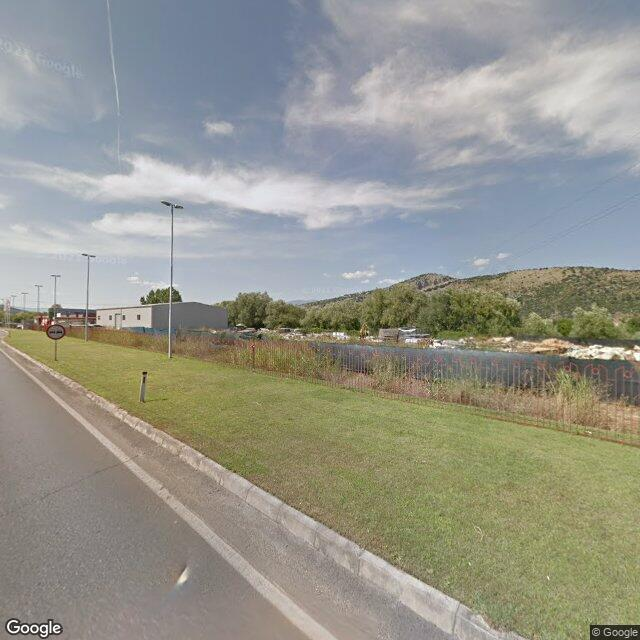

In [ ]:

#@markdown ## Round 5:
#@markdown ---

files = sorted(glob.glob(f"/content/drive/MyDrive/EUGuess/GAME/*jpg"))

idx = random.randint(0, len(files)-1)


mapping = {"Albania": 0, "Austria": 1, "Belgium": 2, "Bosnia Herzegovina": 3, "Bulgaria": 4, "Croatia": 5, "Czech Republic": 6, "Denmark": 7, "Estonia": 8, "Finland": 9, "France": 10, "North Macedonia": 11, "Germany": 12, "Great Britain": 13, "Greece": 14, "Hungary": 15, "Italy": 16, "Latvia": 17, "Lithuania": 18, "Luxembourg": 19, "Montenegro": 20, "Netherlands": 21,  "Poland": 22, "Portugal": 23, "Romania": 24, "Serbia": 25, "Slovakia": 26, "Slovenia": 27, "Spain": 28, "Sweden": 29, "Switzerland": 30, "Turkey": 31} 
counter = {"Albania": 0, "Austria": 0, "Belgium": 0, "Bosnia Herzegovina": 0, "Bulgaria": 0, "Croatia": 0, "Czech Republic": 0, "Denmark": 0, "Estonia": 0, "Finland": 0, "France": 0, "North Macedonia": 0, "Germany": 0, "Great Britain": 0, "Greece": 0, "Hungary": 0, "Italy": 0, "Latvia": 0, "Lithuania": 0, "Luxembourg": 0, "Montenegro": 0, "Netherlands": 0,  "Poland": 0, "Portugal": 0, "Romania": 0, "Serbia": 0, "Slovakia": 0, "Slovenia": 0, "Spain": 0, "Sweden": 0, "Switzerland": 0, "Turkey": 0} 

img = os.path.split(files[idx])[1]

tensor = image_to_tensor_resize(img, 64)
country = img.split("_")[0]

data_country = tensor
labels_country = mapping[country]
tup = (tensor, mapping[country])
join_data_country = tup
labels_country = torch.tensor(labels_country)
data_country = np.array(data_country)

pil_img = Image(filename=files[idx])
display(pil_img)

In [ ]:
################################################################################
# Markdown Format:                                                             #
################################################################################

#@markdown ---

mapping = {"Albania": 0, "Austria": 1, "Belgium": 2, "Bosnia Herzegovina": 3, "Bulgaria": 4, "Croatia": 5, "Czech Republic": 6, "Denmark": 7, "Estonia": 8, "Finland": 9, "France": 10, "North Macedonia": 11, "Germany": 12, "Great Britain": 13, "Greece": 14, "Hungary": 15, "Italy": 16, "Latvia": 17, "Lithuania": 18, "Luxembourg": 19, "Montenegro": 20, "Netherlands": 21,  "Poland": 22, "Portugal": 23, "Romania": 24, "Serbia": 25, "Slovakia": 26, "Slovenia": 27, "Spain": 28, "Sweden": 29, "Switzerland": 30, "Turkey": 31} 



def googlenet_model():

    model = models.googlenet(pretrained=True, progress=True)

    model.eval()
    return model


net = googlenet_model()

model_save_name = 'googlenet_25acc.pt'
path = F"/content/drive/MyDrive/EUGUESS/MODELS/{model_save_name}" 
net.load_state_dict(torch.load(path), strict=False)


inputs = torch.tensor(data_country).unsqueeze(0)

output = net(inputs)

prediction = torch.max(output, dim=-1)

player_guess = "Romania" #@param ["", "Albania", "Austria", "Belgium", "Bosnia Herzegovina", "Bulgaria", "Croatia", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "North Macedonia", "Germany", "Great Britain", "Greece", "Hungary", "Italy", "Latvia", "Lithuania", "Luxembourg", "Montenegro", "Netherlands",  "Poland", "Portugal", "Romania", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey"]

pred_model = [k for k, v in mapping.items() if v == prediction[1]]



print("\n")
print("Predictions:")

real = [k for k, v in mapping.items() if v == labels_country]
print("Real: {}".format(real[0]))


print("EUGuess: {}".format(pred_model[0]))


print("Player: {}".format(player_guess))


#@markdown ---

if player_guess == real[0]:
  correct_player += 1

if pred_model[0] == real[0]:
  correct_model += 1



Predictions:
Real: Montenegro
EUGuess: Albania
Player: Estonia


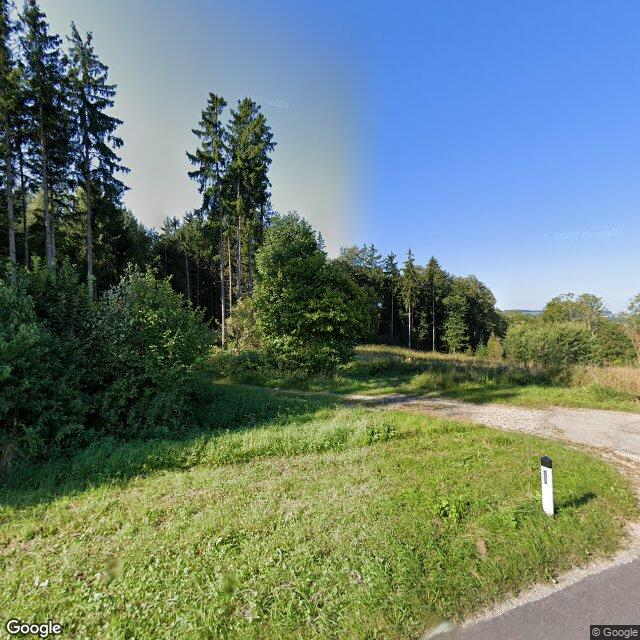

In [ ]:

#@markdown ## Round 6:
#@markdown ---

files = sorted(glob.glob(f"/content/drive/MyDrive/EUGuess/GAME/*jpg"))

idx = random.randint(0, len(files)-1)


mapping = {"Albania": 0, "Austria": 1, "Belgium": 2, "Bosnia Herzegovina": 3, "Bulgaria": 4, "Croatia": 5, "Czech Republic": 6, "Denmark": 7, "Estonia": 8, "Finland": 9, "France": 10, "North Macedonia": 11, "Germany": 12, "Great Britain": 13, "Greece": 14, "Hungary": 15, "Italy": 16, "Latvia": 17, "Lithuania": 18, "Luxembourg": 19, "Montenegro": 20, "Netherlands": 21,  "Poland": 22, "Portugal": 23, "Romania": 24, "Serbia": 25, "Slovakia": 26, "Slovenia": 27, "Spain": 28, "Sweden": 29, "Switzerland": 30, "Turkey": 31} 
counter = {"Albania": 0, "Austria": 0, "Belgium": 0, "Bosnia Herzegovina": 0, "Bulgaria": 0, "Croatia": 0, "Czech Republic": 0, "Denmark": 0, "Estonia": 0, "Finland": 0, "France": 0, "North Macedonia": 0, "Germany": 0, "Great Britain": 0, "Greece": 0, "Hungary": 0, "Italy": 0, "Latvia": 0, "Lithuania": 0, "Luxembourg": 0, "Montenegro": 0, "Netherlands": 0,  "Poland": 0, "Portugal": 0, "Romania": 0, "Serbia": 0, "Slovakia": 0, "Slovenia": 0, "Spain": 0, "Sweden": 0, "Switzerland": 0, "Turkey": 0} 

img = os.path.split(files[idx])[1]

tensor = image_to_tensor_resize(img, 64)
country = img.split("_")[0]

data_country = tensor
labels_country = mapping[country]
tup = (tensor, mapping[country])
join_data_country = tup
labels_country = torch.tensor(labels_country)
data_country = np.array(data_country)

pil_img = Image(filename=files[idx])
display(pil_img)

In [ ]:
################################################################################
# Markdown Format:                                                             #
################################################################################

#@markdown ---

mapping = {"Albania": 0, "Austria": 1, "Belgium": 2, "Bosnia Herzegovina": 3, "Bulgaria": 4, "Croatia": 5, "Czech Republic": 6, "Denmark": 7, "Estonia": 8, "Finland": 9, "France": 10, "North Macedonia": 11, "Germany": 12, "Great Britain": 13, "Greece": 14, "Hungary": 15, "Italy": 16, "Latvia": 17, "Lithuania": 18, "Luxembourg": 19, "Montenegro": 20, "Netherlands": 21,  "Poland": 22, "Portugal": 23, "Romania": 24, "Serbia": 25, "Slovakia": 26, "Slovenia": 27, "Spain": 28, "Sweden": 29, "Switzerland": 30, "Turkey": 31} 



def googlenet_model():

    model = models.googlenet(pretrained=True, progress=True)

    model.eval()
    return model


net = googlenet_model()

model_save_name = 'googlenet_25acc.pt'
path = F"/content/drive/MyDrive/EUGUESS/MODELS/{model_save_name}" 
net.load_state_dict(torch.load(path), strict=False)


inputs = torch.tensor(data_country).unsqueeze(0)

output = net(inputs)

prediction = torch.max(output, dim=-1)

player_guess = "Romania" #@param ["", "Albania", "Austria", "Belgium", "Bosnia Herzegovina", "Bulgaria", "Croatia", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "North Macedonia", "Germany", "Great Britain", "Greece", "Hungary", "Italy", "Latvia", "Lithuania", "Luxembourg", "Montenegro", "Netherlands",  "Poland", "Portugal", "Romania", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey"]

pred_model = [k for k, v in mapping.items() if v == prediction[1]]



print("\n")
print("Predictions:")

real = [k for k, v in mapping.items() if v == labels_country]
print("Real: {}".format(real[0]))


print("EUGuess: {}".format(pred_model[0]))


print("Player: {}".format(player_guess))


#@markdown ---

if player_guess == real[0]:
  correct_player += 1

if pred_model[0] == real[0]:
  correct_model += 1



Predictions:
Real: Austria
EUGuess: Great Britain
Player: Lithuania


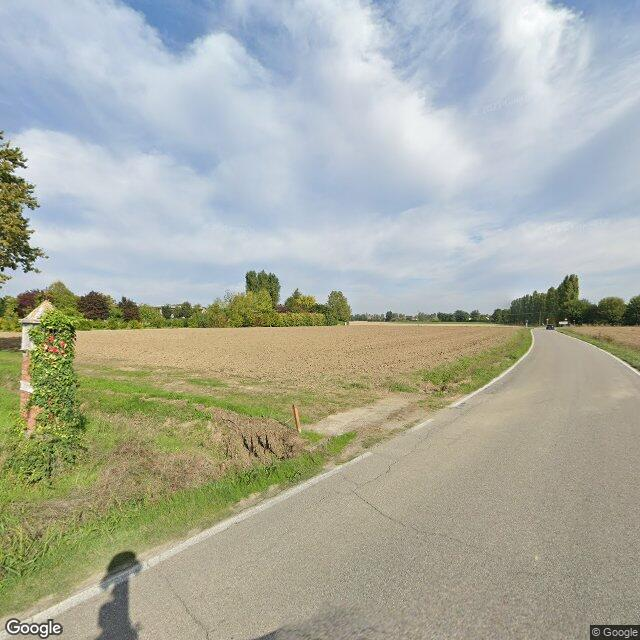

In [ ]:

#@markdown ## Round 7:
#@markdown ---

files = sorted(glob.glob(f"/content/drive/MyDrive/EUGuess/GAME/*jpg"))

idx = random.randint(0, len(files)-1)


mapping = {"Albania": 0, "Austria": 1, "Belgium": 2, "Bosnia Herzegovina": 3, "Bulgaria": 4, "Croatia": 5, "Czech Republic": 6, "Denmark": 7, "Estonia": 8, "Finland": 9, "France": 10, "North Macedonia": 11, "Germany": 12, "Great Britain": 13, "Greece": 14, "Hungary": 15, "Italy": 16, "Latvia": 17, "Lithuania": 18, "Luxembourg": 19, "Montenegro": 20, "Netherlands": 21,  "Poland": 22, "Portugal": 23, "Romania": 24, "Serbia": 25, "Slovakia": 26, "Slovenia": 27, "Spain": 28, "Sweden": 29, "Switzerland": 30, "Turkey": 31} 
counter = {"Albania": 0, "Austria": 0, "Belgium": 0, "Bosnia Herzegovina": 0, "Bulgaria": 0, "Croatia": 0, "Czech Republic": 0, "Denmark": 0, "Estonia": 0, "Finland": 0, "France": 0, "North Macedonia": 0, "Germany": 0, "Great Britain": 0, "Greece": 0, "Hungary": 0, "Italy": 0, "Latvia": 0, "Lithuania": 0, "Luxembourg": 0, "Montenegro": 0, "Netherlands": 0,  "Poland": 0, "Portugal": 0, "Romania": 0, "Serbia": 0, "Slovakia": 0, "Slovenia": 0, "Spain": 0, "Sweden": 0, "Switzerland": 0, "Turkey": 0} 

img = os.path.split(files[idx])[1]

tensor = image_to_tensor_resize(img, 64)
country = img.split("_")[0]

data_country = tensor
labels_country = mapping[country]
tup = (tensor, mapping[country])
join_data_country = tup
labels_country = torch.tensor(labels_country)
data_country = np.array(data_country)

pil_img = Image(filename=files[idx])
display(pil_img)

In [ ]:
################################################################################
# Markdown Format:                                                             #
################################################################################

#@markdown ---

mapping = {"Albania": 0, "Austria": 1, "Belgium": 2, "Bosnia Herzegovina": 3, "Bulgaria": 4, "Croatia": 5, "Czech Republic": 6, "Denmark": 7, "Estonia": 8, "Finland": 9, "France": 10, "North Macedonia": 11, "Germany": 12, "Great Britain": 13, "Greece": 14, "Hungary": 15, "Italy": 16, "Latvia": 17, "Lithuania": 18, "Luxembourg": 19, "Montenegro": 20, "Netherlands": 21,  "Poland": 22, "Portugal": 23, "Romania": 24, "Serbia": 25, "Slovakia": 26, "Slovenia": 27, "Spain": 28, "Sweden": 29, "Switzerland": 30, "Turkey": 31} 



def googlenet_model():

    model = models.googlenet(pretrained=True, progress=True)

    model.eval()
    return model


net = googlenet_model()

model_save_name = 'googlenet_25acc.pt'
path = F"/content/drive/MyDrive/EUGUESS/MODELS/{model_save_name}" 
net.load_state_dict(torch.load(path), strict=False)


inputs = torch.tensor(data_country).unsqueeze(0)

output = net(inputs)

prediction = torch.max(output, dim=-1)

player_guess = "Romania" #@param ["", "Albania", "Austria", "Belgium", "Bosnia Herzegovina", "Bulgaria", "Croatia", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "North Macedonia", "Germany", "Great Britain", "Greece", "Hungary", "Italy", "Latvia", "Lithuania", "Luxembourg", "Montenegro", "Netherlands",  "Poland", "Portugal", "Romania", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey"]

pred_model = [k for k, v in mapping.items() if v == prediction[1]]



print("\n")
print("Predictions:")

real = [k for k, v in mapping.items() if v == labels_country]
print("Real: {}".format(real[0]))


print("EUGuess: {}".format(pred_model[0]))


print("Player: {}".format(player_guess))


#@markdown ---

if player_guess == real[0]:
  correct_player += 1

if pred_model[0] == real[0]:
  correct_model += 1



Predictions:
Real: Italy
EUGuess: Romania
Player: Bulgaria


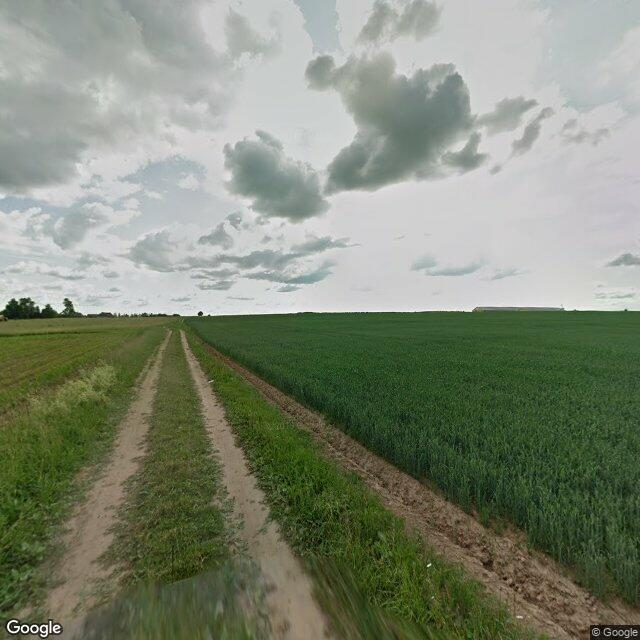

In [ ]:

#@markdown ## Round 8:
#@markdown ---

files = sorted(glob.glob(f"/content/drive/MyDrive/EUGuess/GAME/*jpg"))

idx = random.randint(0, len(files)-1)


mapping = {"Albania": 0, "Austria": 1, "Belgium": 2, "Bosnia Herzegovina": 3, "Bulgaria": 4, "Croatia": 5, "Czech Republic": 6, "Denmark": 7, "Estonia": 8, "Finland": 9, "France": 10, "North Macedonia": 11, "Germany": 12, "Great Britain": 13, "Greece": 14, "Hungary": 15, "Italy": 16, "Latvia": 17, "Lithuania": 18, "Luxembourg": 19, "Montenegro": 20, "Netherlands": 21,  "Poland": 22, "Portugal": 23, "Romania": 24, "Serbia": 25, "Slovakia": 26, "Slovenia": 27, "Spain": 28, "Sweden": 29, "Switzerland": 30, "Turkey": 31} 
counter = {"Albania": 0, "Austria": 0, "Belgium": 0, "Bosnia Herzegovina": 0, "Bulgaria": 0, "Croatia": 0, "Czech Republic": 0, "Denmark": 0, "Estonia": 0, "Finland": 0, "France": 0, "North Macedonia": 0, "Germany": 0, "Great Britain": 0, "Greece": 0, "Hungary": 0, "Italy": 0, "Latvia": 0, "Lithuania": 0, "Luxembourg": 0, "Montenegro": 0, "Netherlands": 0,  "Poland": 0, "Portugal": 0, "Romania": 0, "Serbia": 0, "Slovakia": 0, "Slovenia": 0, "Spain": 0, "Sweden": 0, "Switzerland": 0, "Turkey": 0} 

img = os.path.split(files[idx])[1]

tensor = image_to_tensor_resize(img, 64)
country = img.split("_")[0]

data_country = tensor
labels_country = mapping[country]
tup = (tensor, mapping[country])
join_data_country = tup
labels_country = torch.tensor(labels_country)
data_country = np.array(data_country)

pil_img = Image(filename=files[idx])
display(pil_img)

In [ ]:
################################################################################
# Markdown Format:                                                             #
################################################################################

#@markdown ---

mapping = {"Albania": 0, "Austria": 1, "Belgium": 2, "Bosnia Herzegovina": 3, "Bulgaria": 4, "Croatia": 5, "Czech Republic": 6, "Denmark": 7, "Estonia": 8, "Finland": 9, "France": 10, "North Macedonia": 11, "Germany": 12, "Great Britain": 13, "Greece": 14, "Hungary": 15, "Italy": 16, "Latvia": 17, "Lithuania": 18, "Luxembourg": 19, "Montenegro": 20, "Netherlands": 21,  "Poland": 22, "Portugal": 23, "Romania": 24, "Serbia": 25, "Slovakia": 26, "Slovenia": 27, "Spain": 28, "Sweden": 29, "Switzerland": 30, "Turkey": 31} 



def googlenet_model():

    model = models.googlenet(pretrained=True, progress=True)

    model.eval()
    return model


net = googlenet_model()

model_save_name = 'googlenet_25acc.pt'
path = F"/content/drive/MyDrive/EUGUESS/MODELS/{model_save_name}" 
net.load_state_dict(torch.load(path), strict=False)


inputs = torch.tensor(data_country).unsqueeze(0)

output = net(inputs)

prediction = torch.max(output, dim=-1)

player_guess = "Romania" #@param ["", "Albania", "Austria", "Belgium", "Bosnia Herzegovina", "Bulgaria", "Croatia", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "North Macedonia", "Germany", "Great Britain", "Greece", "Hungary", "Italy", "Latvia", "Lithuania", "Luxembourg", "Montenegro", "Netherlands",  "Poland", "Portugal", "Romania", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey"]

pred_model = [k for k, v in mapping.items() if v == prediction[1]]



print("\n")
print("Predictions:")

real = [k for k, v in mapping.items() if v == labels_country]
print("Real: {}".format(real[0]))


print("EUGuess: {}".format(pred_model[0]))


print("Player: {}".format(player_guess))


#@markdown ---

if player_guess == real[0]:
  correct_player += 1

if pred_model[0] == real[0]:
  correct_model += 1



Predictions:
Real: Latvia
EUGuess: Poland
Player: Denmark


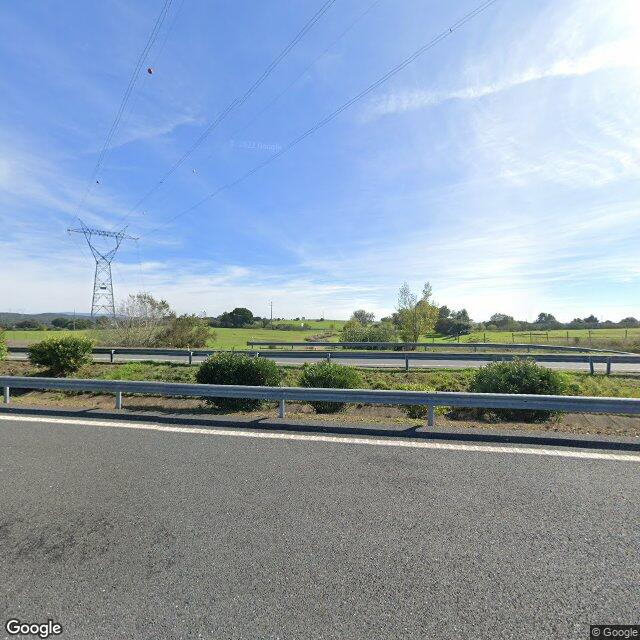

In [ ]:

#@markdown ## Round 9:
#@markdown ---

files = sorted(glob.glob(f"/content/drive/MyDrive/EUGuess/GAME/*jpg"))

idx = random.randint(0, len(files)-1)


mapping = {"Albania": 0, "Austria": 1, "Belgium": 2, "Bosnia Herzegovina": 3, "Bulgaria": 4, "Croatia": 5, "Czech Republic": 6, "Denmark": 7, "Estonia": 8, "Finland": 9, "France": 10, "North Macedonia": 11, "Germany": 12, "Great Britain": 13, "Greece": 14, "Hungary": 15, "Italy": 16, "Latvia": 17, "Lithuania": 18, "Luxembourg": 19, "Montenegro": 20, "Netherlands": 21,  "Poland": 22, "Portugal": 23, "Romania": 24, "Serbia": 25, "Slovakia": 26, "Slovenia": 27, "Spain": 28, "Sweden": 29, "Switzerland": 30, "Turkey": 31} 
counter = {"Albania": 0, "Austria": 0, "Belgium": 0, "Bosnia Herzegovina": 0, "Bulgaria": 0, "Croatia": 0, "Czech Republic": 0, "Denmark": 0, "Estonia": 0, "Finland": 0, "France": 0, "North Macedonia": 0, "Germany": 0, "Great Britain": 0, "Greece": 0, "Hungary": 0, "Italy": 0, "Latvia": 0, "Lithuania": 0, "Luxembourg": 0, "Montenegro": 0, "Netherlands": 0,  "Poland": 0, "Portugal": 0, "Romania": 0, "Serbia": 0, "Slovakia": 0, "Slovenia": 0, "Spain": 0, "Sweden": 0, "Switzerland": 0, "Turkey": 0} 

img = os.path.split(files[idx])[1]

tensor = image_to_tensor_resize(img, 64)
country = img.split("_")[0]

data_country = tensor
labels_country = mapping[country]
tup = (tensor, mapping[country])
join_data_country = tup
labels_country = torch.tensor(labels_country)
data_country = np.array(data_country)

pil_img = Image(filename=files[idx])
display(pil_img)

In [ ]:
################################################################################
# Markdown Format:                                                             #
################################################################################

#@markdown ---

mapping = {"Albania": 0, "Austria": 1, "Belgium": 2, "Bosnia Herzegovina": 3, "Bulgaria": 4, "Croatia": 5, "Czech Republic": 6, "Denmark": 7, "Estonia": 8, "Finland": 9, "France": 10, "North Macedonia": 11, "Germany": 12, "Great Britain": 13, "Greece": 14, "Hungary": 15, "Italy": 16, "Latvia": 17, "Lithuania": 18, "Luxembourg": 19, "Montenegro": 20, "Netherlands": 21,  "Poland": 22, "Portugal": 23, "Romania": 24, "Serbia": 25, "Slovakia": 26, "Slovenia": 27, "Spain": 28, "Sweden": 29, "Switzerland": 30, "Turkey": 31} 



def googlenet_model():

    model = models.googlenet(pretrained=True, progress=True)

    model.eval()
    return model


net = googlenet_model()

model_save_name = 'googlenet_25acc.pt'
path = F"/content/drive/MyDrive/EUGUESS/MODELS/{model_save_name}" 
net.load_state_dict(torch.load(path), strict=False)


inputs = torch.tensor(data_country).unsqueeze(0)

output = net(inputs)

prediction = torch.max(output, dim=-1)

player_guess = "Romania" #@param ["", "Albania", "Austria", "Belgium", "Bosnia Herzegovina", "Bulgaria", "Croatia", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "North Macedonia", "Germany", "Great Britain", "Greece", "Hungary", "Italy", "Latvia", "Lithuania", "Luxembourg", "Montenegro", "Netherlands",  "Poland", "Portugal", "Romania", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey"]

pred_model = [k for k, v in mapping.items() if v == prediction[1]]



print("\n")
print("Predictions:")

real = [k for k, v in mapping.items() if v == labels_country]
print("Real: {}".format(real[0]))


print("EUGuess: {}".format(pred_model[0]))


print("Player: {}".format(player_guess))


#@markdown ---

if player_guess == real[0]:
  correct_player += 1

if pred_model[0] == real[0]:
  correct_model += 1



Predictions:
Real: Portugal
EUGuess: Poland
Player: Albania


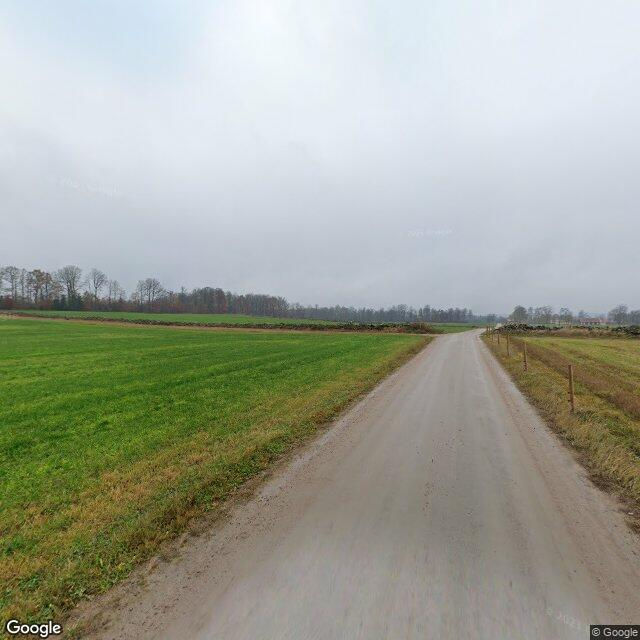

In [ ]:

#@markdown ## Round 10:
#@markdown ---

files = sorted(glob.glob(f"/content/drive/MyDrive/EUGuess/GAME/*jpg"))

idx = random.randint(0, len(files)-1)


mapping = {"Albania": 0, "Austria": 1, "Belgium": 2, "Bosnia Herzegovina": 3, "Bulgaria": 4, "Croatia": 5, "Czech Republic": 6, "Denmark": 7, "Estonia": 8, "Finland": 9, "France": 10, "North Macedonia": 11, "Germany": 12, "Great Britain": 13, "Greece": 14, "Hungary": 15, "Italy": 16, "Latvia": 17, "Lithuania": 18, "Luxembourg": 19, "Montenegro": 20, "Netherlands": 21,  "Poland": 22, "Portugal": 23, "Romania": 24, "Serbia": 25, "Slovakia": 26, "Slovenia": 27, "Spain": 28, "Sweden": 29, "Switzerland": 30, "Turkey": 31} 
counter = {"Albania": 0, "Austria": 0, "Belgium": 0, "Bosnia Herzegovina": 0, "Bulgaria": 0, "Croatia": 0, "Czech Republic": 0, "Denmark": 0, "Estonia": 0, "Finland": 0, "France": 0, "North Macedonia": 0, "Germany": 0, "Great Britain": 0, "Greece": 0, "Hungary": 0, "Italy": 0, "Latvia": 0, "Lithuania": 0, "Luxembourg": 0, "Montenegro": 0, "Netherlands": 0,  "Poland": 0, "Portugal": 0, "Romania": 0, "Serbia": 0, "Slovakia": 0, "Slovenia": 0, "Spain": 0, "Sweden": 0, "Switzerland": 0, "Turkey": 0} 

img = os.path.split(files[idx])[1]

tensor = image_to_tensor_resize(img, 64)
country = img.split("_")[0]

data_country = tensor
labels_country = mapping[country]
tup = (tensor, mapping[country])
join_data_country = tup
labels_country = torch.tensor(labels_country)
data_country = np.array(data_country)

pil_img = Image(filename=files[idx])
display(pil_img)

In [ ]:
################################################################################
# Markdown Format:                                                             #
################################################################################

#@markdown ---

mapping = {"Albania": 0, "Austria": 1, "Belgium": 2, "Bosnia Herzegovina": 3, "Bulgaria": 4, "Croatia": 5, "Czech Republic": 6, "Denmark": 7, "Estonia": 8, "Finland": 9, "France": 10, "North Macedonia": 11, "Germany": 12, "Great Britain": 13, "Greece": 14, "Hungary": 15, "Italy": 16, "Latvia": 17, "Lithuania": 18, "Luxembourg": 19, "Montenegro": 20, "Netherlands": 21,  "Poland": 22, "Portugal": 23, "Romania": 24, "Serbia": 25, "Slovakia": 26, "Slovenia": 27, "Spain": 28, "Sweden": 29, "Switzerland": 30, "Turkey": 31} 



def googlenet_model():

    model = models.googlenet(pretrained=True, progress=True)

    model.eval()
    return model


net = googlenet_model()

model_save_name = 'googlenet_25acc.pt'
path = F"/content/drive/MyDrive/EUGUESS/MODELS/{model_save_name}" 
net.load_state_dict(torch.load(path), strict=False)


inputs = torch.tensor(data_country).unsqueeze(0)

output = net(inputs)

prediction = torch.max(output, dim=-1)

player_guess = "Romania" #@param ["", "Albania", "Austria", "Belgium", "Bosnia Herzegovina", "Bulgaria", "Croatia", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "North Macedonia", "Germany", "Great Britain", "Greece", "Hungary", "Italy", "Latvia", "Lithuania", "Luxembourg", "Montenegro", "Netherlands",  "Poland", "Portugal", "Romania", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey"]

pred_model = [k for k, v in mapping.items() if v == prediction[1]]



print("\n")
print("Predictions:")

real = [k for k, v in mapping.items() if v == labels_country]
print("Real: {}".format(real[0]))


print("EUGuess: {}".format(pred_model[0]))


print("Player: {}".format(player_guess))


#@markdown ---

if player_guess == real[0]:
  correct_player += 1

if pred_model[0] == real[0]:
  correct_model += 1



Predictions:
Real: Sweden
EUGuess: Turkey
Player: Serbia


In [ ]:
#@markdown ---
#@markdown # Final Results:
#@markdown ---

print("EUGuess Accuracy: {}".format(correct_model / 10))
print("Player Accuracy: {}".format(correct_player / 10))

print("\n")

scoreboard[name] = correct_player / 10

if correct_model > correct_player:
  print("EUGuess won!")

elif correct_model < correct_player:
  print("{} won!".format(name))

elif correct_model == correct_player:
  print("It's a draw!")

EUGuess Accuracy: 0.2
Player Accuracy: 0.1


EUGuess won!


In [ ]:
#@markdown ---
#@markdown # Scoreboard:
#@markdown ---

table = sorted(scoreboard.items(), key=lambda x: x[1], reverse=True)
pos = 1
print("{:<5} {:<15} {:<5}".format("Pos", "Name", "Acc."))
for i in table:
  print("{:<5} {:<15} {:<5}".format(pos, i[0], i[1]))
  pos += 1

Pos   Name            Acc. 
1     Eva             0.1  
2     Test            0    
